In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
stroke= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Understanding

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
stroke.shape

(5110, 12)

In [9]:
missing_columns = stroke["bmi"].isnull().sum()
print(missing_columns)

201


In [10]:
stroke = stroke.fillna(np.mean(stroke['bmi']))

In [11]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#id column not relevant for the analysis
stroke= stroke.drop(['id'],axis=1)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Data Visualisation

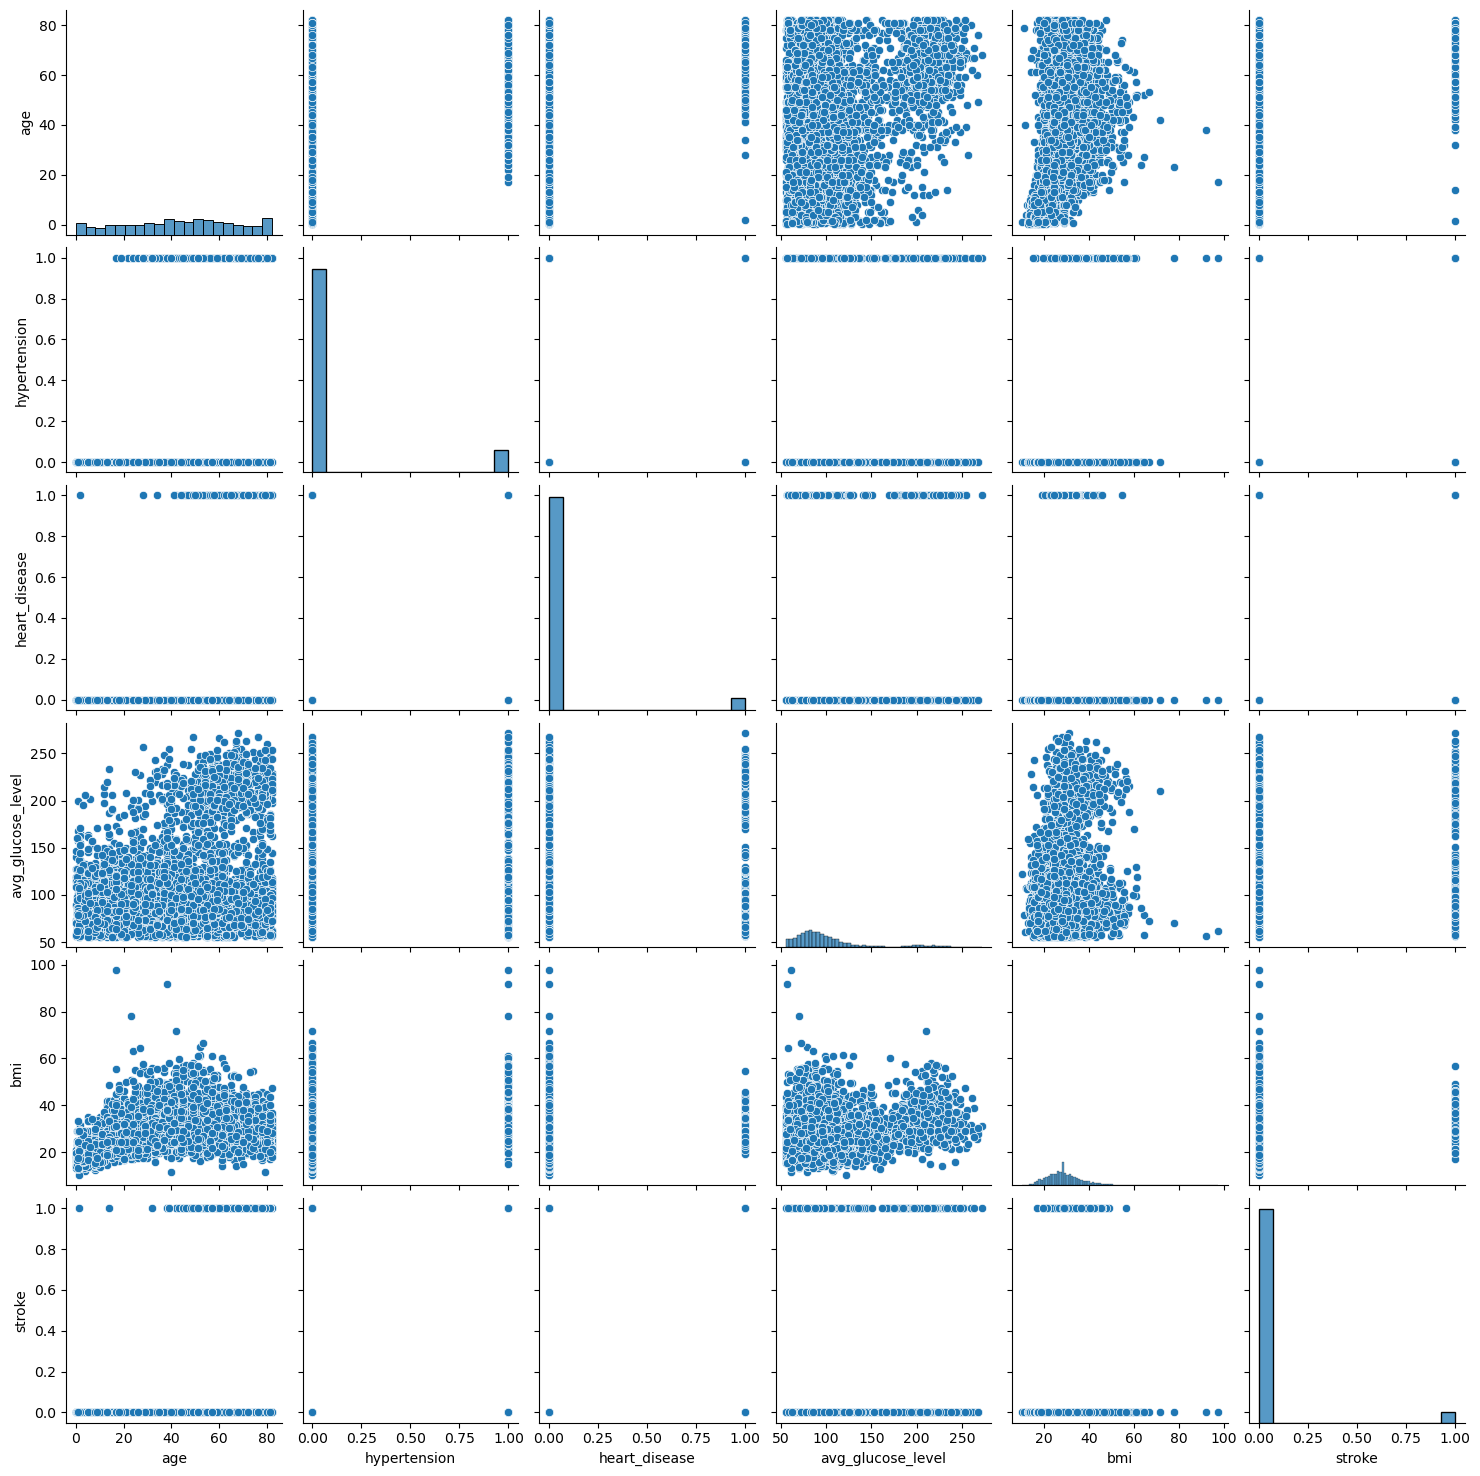

In [13]:
sns.pairplot(stroke)

In [14]:
#Visualising separate columns

<Axes: ylabel='gender'>

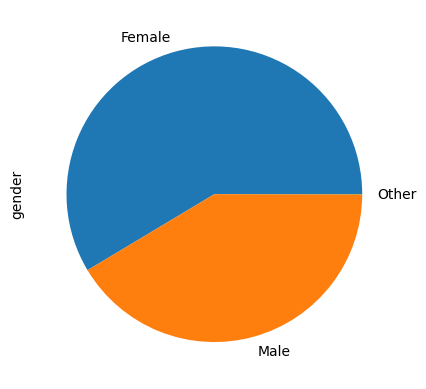

In [15]:
stroke['gender'].value_counts().plot(kind="pie")

<Axes: >

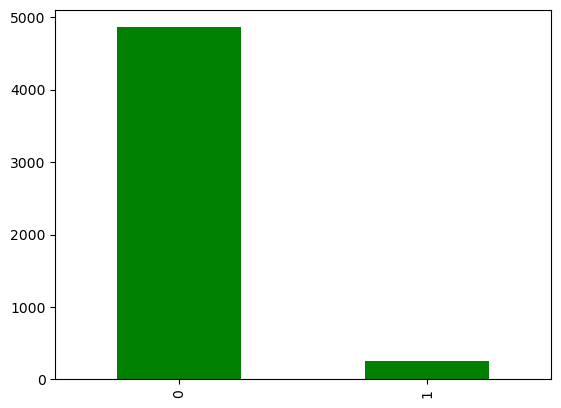

In [16]:
stroke['stroke'].value_counts().plot(kind="bar",color = "green")

In [17]:
#Percentage of people who got stroke
print(stroke['stroke'].value_counts()[1]/stroke['stroke'].value_counts().sum().round(3)*100)

4.87279843444227


<Axes: >

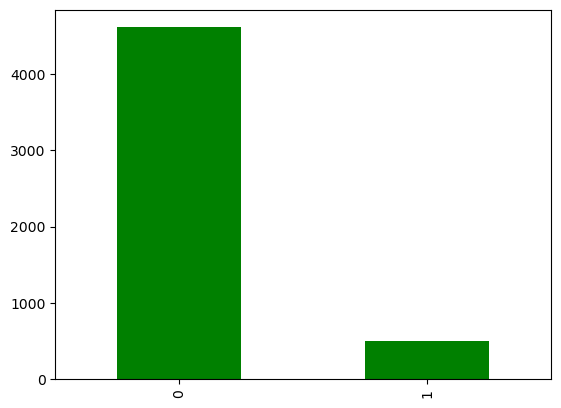

In [18]:
stroke['hypertension'].value_counts().plot(kind="bar",color = "green")

<Axes: ylabel='work_type'>

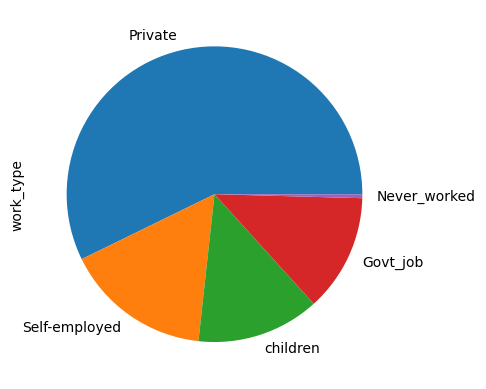

In [19]:
stroke['work_type'].value_counts().plot(kind="pie")

<Axes: ylabel='smoking_status'>

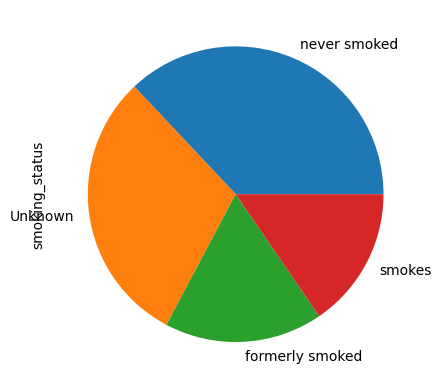

In [20]:
stroke['smoking_status'].value_counts().plot(kind="pie")

<Axes: ylabel='Residence_type'>

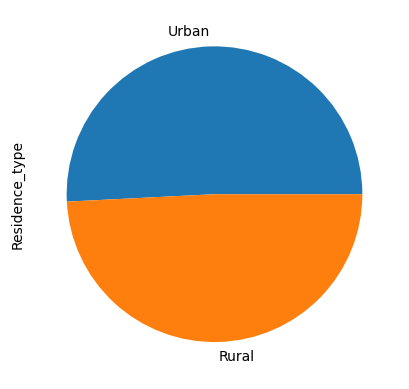

In [21]:
stroke['Residence_type'].value_counts().plot(kind="pie")


<Axes: xlabel='bmi', ylabel='Count'>

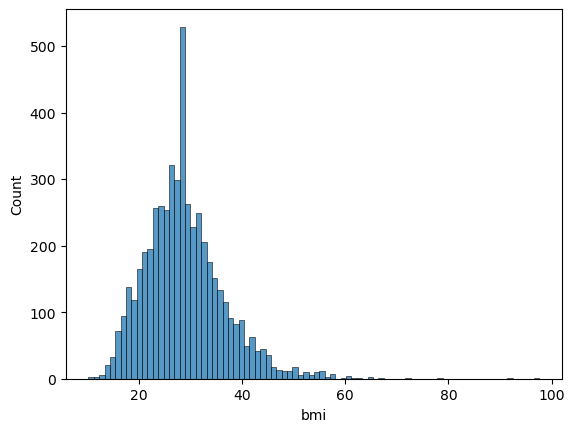

In [22]:
sns.histplot(data=stroke['bmi'])

<Axes: >

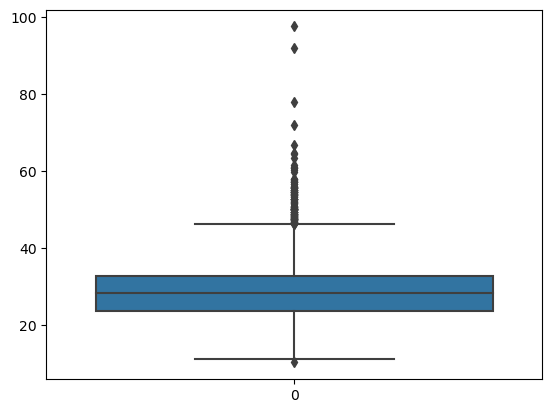

In [23]:
sns.boxplot(data=stroke['bmi'])

In [24]:
#Based on the histogram and boxplot we see that there are many outliers in bmi

In [25]:
Q1 = stroke['bmi'].quantile(0.25)
Q3 = stroke['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(stroke['bmi'] < (Q1 - 1.5 * IQR)) | (stroke['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4984
True      126
Name: bmi, dtype: int64

Total outliers in bmi:126

Total non-outliers in bmi:4984

<Axes: xlabel='age', ylabel='Count'>

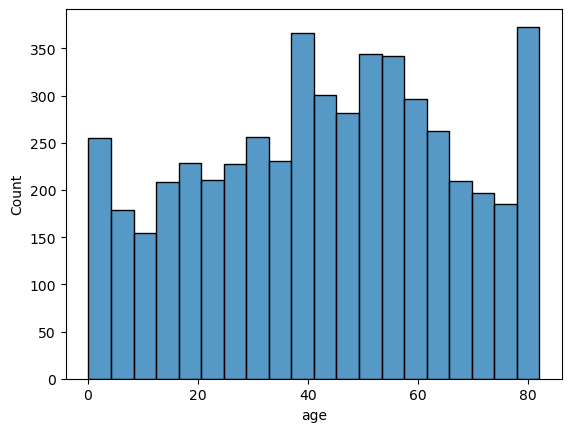

In [26]:
sns.histplot(data=stroke['age'])

<Axes: >

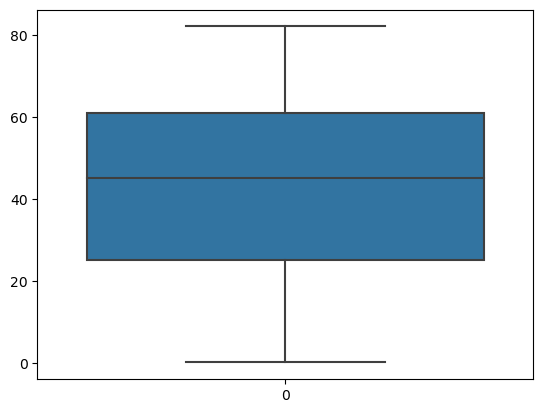

In [27]:
sns.boxplot(data=stroke['age'])

Age= No outliers
Normal Distribution

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

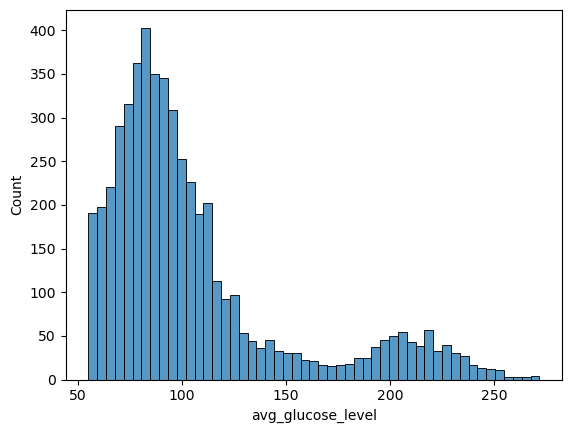

In [28]:
sns.histplot(data= stroke['avg_glucose_level'])

<Axes: >

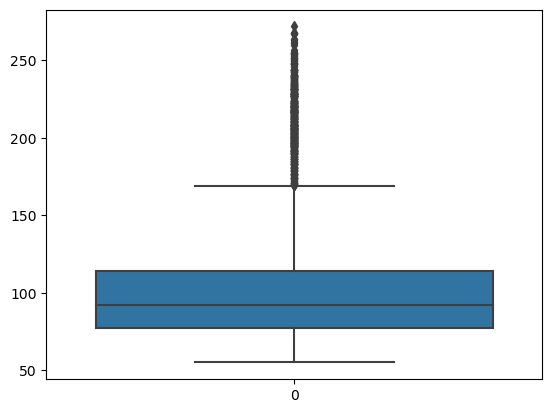

In [29]:
sns.boxplot(data= stroke['avg_glucose_level'])

There are many outliers present based on the boxplot and histogram

The data is positively skewed

In [30]:
Q1 = stroke['avg_glucose_level'].quantile(0.25)
Q3 = stroke['avg_glucose_level'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(stroke['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (stroke['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4483
True      627
Name: avg_glucose_level, dtype: int64

Total outliers in avg_glucose_level : 627
    
Total non-outliers in avg_glucose_level : 4483

<Axes: >

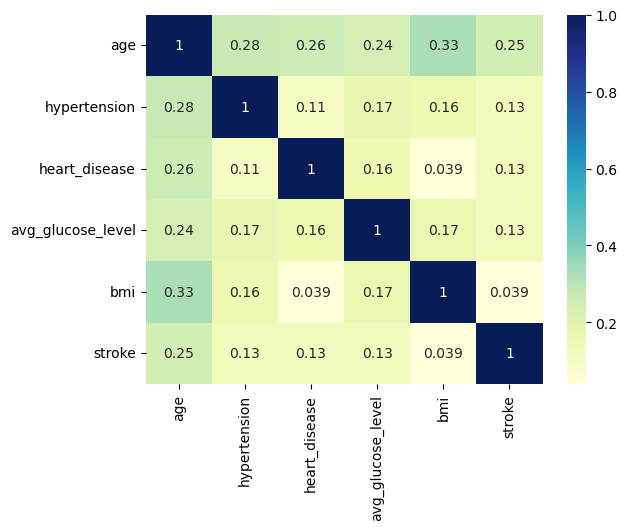

In [31]:

sns.heatmap(stroke.corr(),cmap="YlGnBu",annot=True)

Age and bmi were highly correlated.
Rest all correlations were less than 0.32

# Heart disease analysis

<Axes: ylabel='heart_disease'>

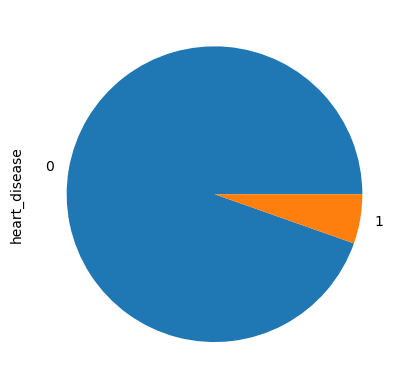

In [32]:
stroke['heart_disease'].value_counts().plot(kind="pie")


<Axes: xlabel='stroke', ylabel='count'>

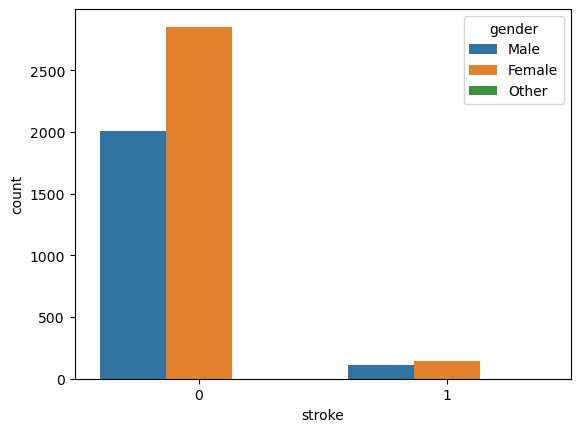

In [33]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=stroke)

<Axes: xlabel='stroke', ylabel='count'>

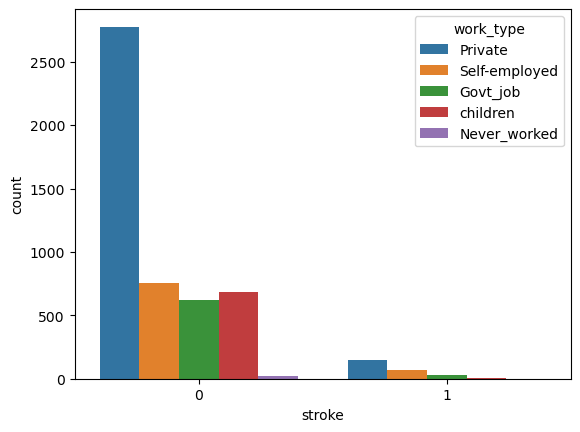

In [34]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=stroke)

<Axes: xlabel='stroke', ylabel='count'>

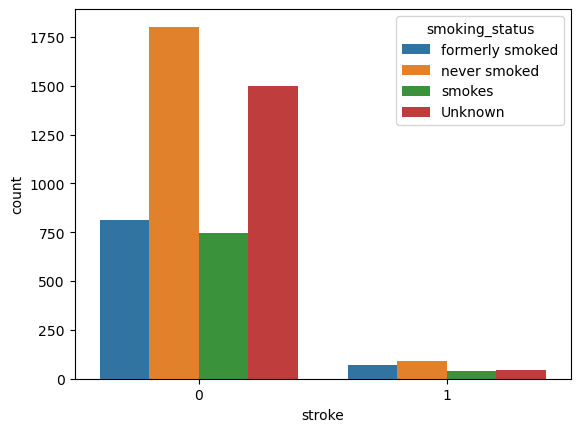

In [35]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=stroke)

<Axes: xlabel='stroke', ylabel='count'>

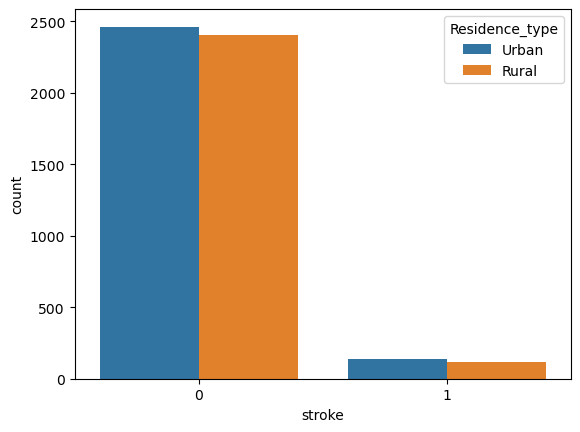

In [36]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=stroke)

<Axes: xlabel='stroke', ylabel='count'>

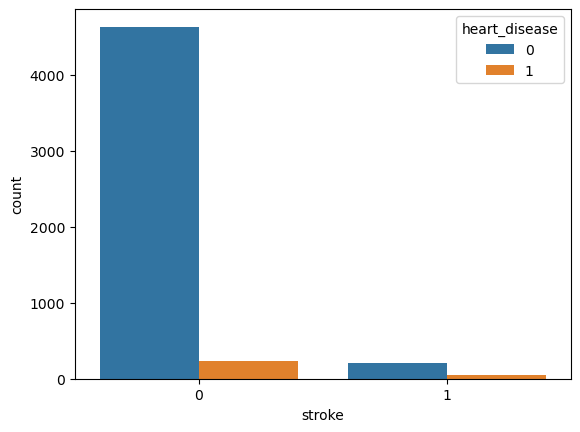

In [37]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=stroke)

This plotting shows that the number of "people with Strokes but no heart disease" is more than the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

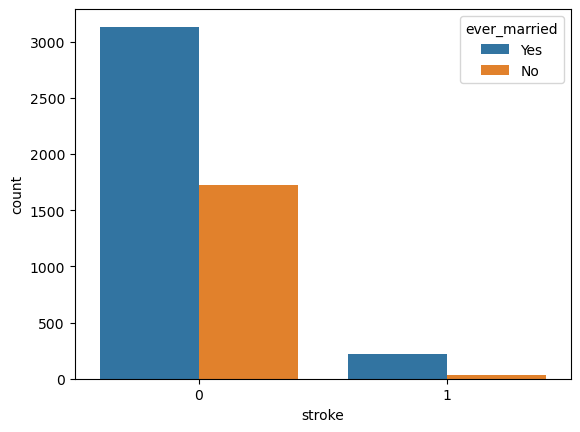

In [38]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=stroke)

This shows that the number of "Married people with Strokes" is approximately more the no. "Unmarried people with Strokes".
This shows most of the Married people got Strokes compared to Unmarried people.

In [39]:
stroke[['hypertension', 'heart_disease', 'stroke']] = stroke[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
stroke = pd.get_dummies(stroke, drop_first= True)

In [40]:
stroke.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.600000,1,0,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.893237,0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.500000,1,0,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.400000,0,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.000000,0,0,1,0,1,0,0,1,0,0,0,1,0,1


# Scaling The features

In [41]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
#Scaling the numeric values for bringing them all to the same scale
stroke[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(stroke[['bmi', 'avg_glucose_level', 'age']])

# Splitting the data into Train and test data

In [42]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test= train_test_split(stroke, train_size=0.7, test_size=0.3, random_state=100)

# Create Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

NameError: name 'X_train' is not defined

# Train the Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# KNN

In [ ]:
# importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

# XGBoost

In [ ]:
pip install xgboost

In [ ]:
#importing the XGBoost Classifier module
from xgboost  import XGBClassifier

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# plots of roc_auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.boxplot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
# Plotting the confusion matrix of the model
from sklearn.metrics import plot_confusion_matrix,precision_recall_fscore_support
plot_confusion_matrix(xgb,X_test,y_test)

In [ ]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# Summary

In summary, two highest stroke prediction performance were achieved by XGBoost and random forest; three most important features (in descending order) for stroke prediction were 'age', 'avg_glucose_level', and 'bmi'.

​